In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os


## Load the dataset

In [2]:
# Load the dataset
dataset_path = r"D:\AI&ML Only\ML\Heart diseases\heart.csv"
df = pd.read_csv(dataset_path)


In [3]:
print(df.columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


In [4]:
# Basic data exploration
print(df.head())
print(df.info())
print(df.describe())


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 en

In [5]:
# Handle missing values if any
df = df.dropna()

# Encode categorical variables if any
df = pd.get_dummies(df, drop_first=True)

# Save the preprocessed dataset
preprocessed_dataset_path = r"D:\AI&ML Only\ML\Heart diseases\heart_preprocessed.csv"
df.to_csv(preprocessed_dataset_path, index=False)
print(f"Preprocessed dataset saved at: {preprocessed_dataset_path}")


Preprocessed dataset saved at: D:\AI&ML Only\ML\Heart diseases\heart_preprocessed.csv


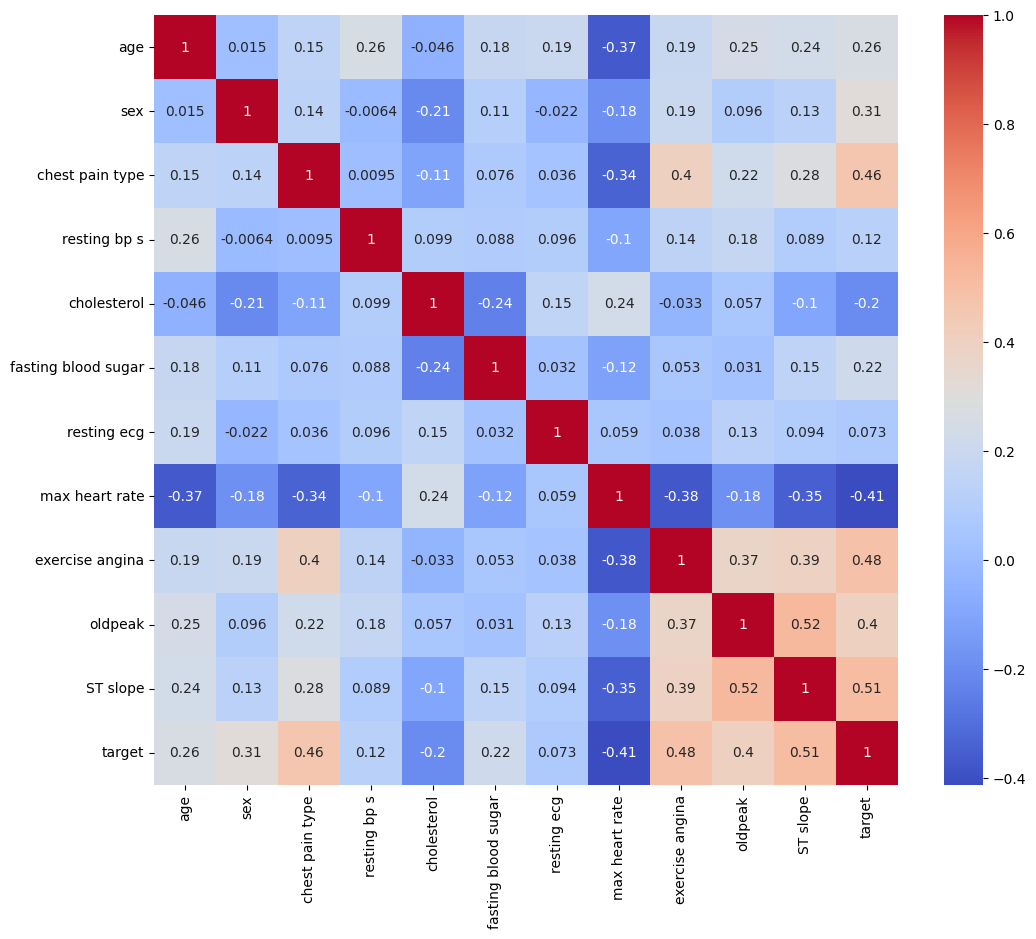

In [6]:
# Correlation matrix for feature selection
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


## Split the dataset 

In [7]:
# Split the dataset into features and target variable
X = df.drop('target', axis=1)  # Replace 'target' with your actual target column name
y = df['target']  # Replace 'target' with your actual target column name

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save the test data for manual model testing
test_data_path = r"D:\AI&ML Only\ML\Heart diseases\heart_test_data.csv"
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv(test_data_path, index=False)
print(f"Test data saved at: {test_data_path}")


Test data saved at: D:\AI&ML Only\ML\Heart diseases\heart_test_data.csv


In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Model selection

In [9]:
from sklearn.model_selection import cross_val_score

# Train different models and store their cross-validation accuracy
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),  # Increased max_iter for better convergence
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

accuracies = {}
cv_results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    accuracies[name] = cv_scores.mean()
    cv_results[name] = cv_scores
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred)}")


Logistic Regression - Accuracy: 0.8613445378151261
Decision Tree - Accuracy: 0.8865546218487395
Random Forest - Accuracy: 0.9537815126050421
Support Vector Machine - Accuracy: 0.8907563025210085
K-Nearest Neighbors - Accuracy: 0.8865546218487395


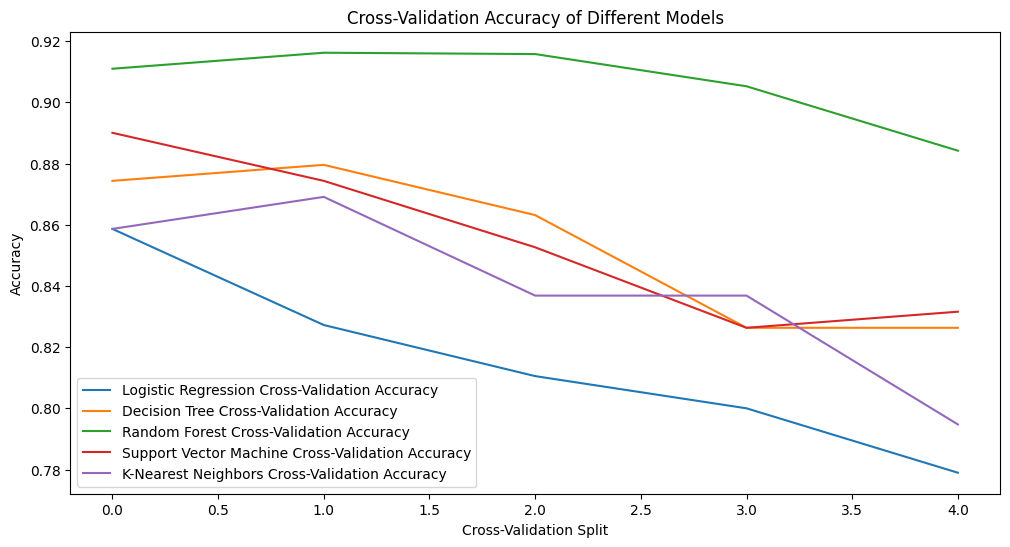

In [10]:
# Plot cross-validation accuracy
plt.figure(figsize=(12, 6))

for name, scores in cv_results.items():
    plt.plot(scores, label=f'{name} Cross-Validation Accuracy')

plt.title('Cross-Validation Accuracy of Different Models')
plt.xlabel('Cross-Validation Split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Logistic Regression:
Accuracy: 0.8613445378151261
Precision: 0.8712121212121212
Recall: 0.8778625954198473
F1 Score: 0.8745247148288974
ROC AUC: 0.9088249982164515

Decision Tree:
Accuracy: 0.8865546218487395
Precision: 0.9262295081967213
Recall: 0.8625954198473282
F1 Score: 0.8932806324110671
ROC AUC: 0.889241635157309

Random Forest:
Accuracy: 0.9537815126050421
Precision: 0.9477611940298507
Recall: 0.9694656488549618
F1 Score: 0.9584905660377359
ROC AUC: 0.971320539345081

Support Vector Machine:
Accuracy: 0.8907563025210085
Precision: 0.8671328671328671
Recall: 0.9465648854961832
F1 Score: 0.9051094890510949
ROC AUC: 0.9475636726831704

K-Nearest Neighbors:
Accuracy: 0.8865546218487395
Precision: 0.8714285714285714
Recall: 0.9312977099236641
F1 Score: 0.9003690036900369
ROC AUC: 0.9379325105229365



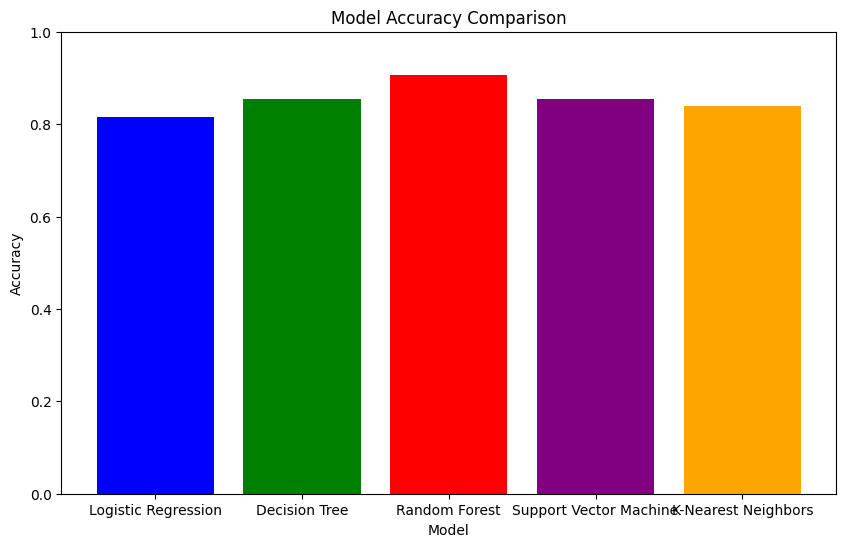

In [11]:
# Evaluate the models and plot accuracy comparison
import matplotlib.pyplot as plt

# Evaluate the models
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"{name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob)}\n")

# Plotting accuracy comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


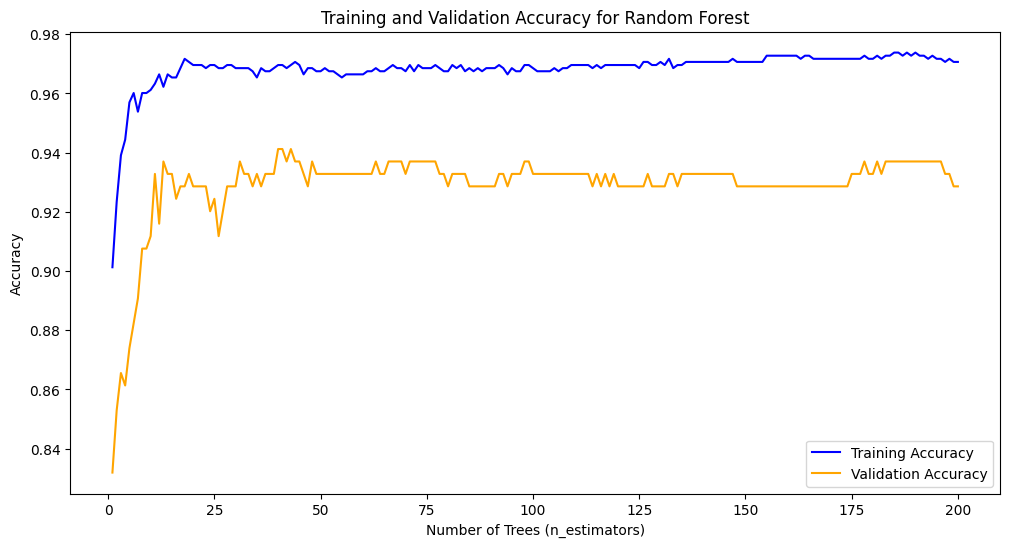

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Prepare to track accuracy
train_accuracies = []
val_accuracies = []

# Splitting the data again to maintain the validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model in stages to simulate epochs
for i in range(1, 201):
    rf_model = RandomForestClassifier(n_estimators=i, max_features='sqrt', max_depth=8, criterion='gini', random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Training accuracy
    train_pred = rf_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)
    
    # Validation accuracy
    val_pred = rf_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_accuracy)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(range(1, 201), train_accuracies, label='Training Accuracy', color='blue')
plt.plot(range(1, 201), val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy for Random Forest')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


In [ ]:
import joblib

# Train the final model with the best parameters
final_model = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=8, criterion='gini')
final_model.fit(X_train, y_train)

# Evaluate the final model
y_pred_final = final_model.predict(X_test)
y_prob_final = final_model.predict_proba(X_test)[:, 1]

print("Final Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final)}")
print(f"Precision: {precision_score(y_test, y_pred_final)}")
print(f"Recall: {recall_score(y_test, y_pred_final)}")
print(f"F1 Score: {f1_score(y_test, y_pred_final)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_final)}")

# Save the final model
model_path = r"D:\AI&ML Only\ML\Heart diseases\best_model.pkl"
joblib.dump(final_model, model_path)
print(f"Best model saved at: {model_path}")


In [ ]:
# Save the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
scaler_path = r"D:\AI&ML Only\ML\Heart diseases\scaler.pkl"
joblib.dump(scaler, scaler_path)


## Manual Testing with Sample Data

In [ ]:
import joblib
import pandas as pd

# Load the saved model
model_path = r"D:\AI&ML Only\ML\Heart diseases\best_model.pkl"
model = joblib.load(model_path)


In [ ]:
# Load your sample data
sample_data_path = r"D:\AI&ML Only\ML\Heart diseases\sample_data.csv"
sample_data = pd.read_csv(sample_data_path)

# If necessary, preprocess the sample data (e.g., scaling)
sample_data_preprocessed = scaler.transform(sample_data)


In [ ]:
# Make predictions with the loaded model
predictions = model.predict(sample_data_preprocessed)

# Show predictions
print("Predictions:", predictions)


## Finial Model Accuracy Check with Orginal result and predictions

In [ ]:
import pandas as pd
import numpy as np

# Original results
original_results = np.array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
                             1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
                             1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
                             1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
                             0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
                             0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                             1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

# Model predictions
model_predictions = np.array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
                              1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
                              1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
                              1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
                              1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
                              1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
                              0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

# Check the lengths of original results and model predictions
original_length = len(original_results)
predictions_length = len(model_predictions)

print(f"Original Results Length: {original_length}")
print(f"Model Predictions Length: {predictions_length}")

if original_length != predictions_length:
    # Handle the mismatch
    min_length = min(original_length, predictions_length)
    original_results = original_results[:min_length]
    model_predictions = model_predictions[:min_length]

# Compare results
comparison = pd.DataFrame({'Original': original_results, 'Prediction': model_predictions})
comparison['Match'] = comparison['Original'] == comparison['Prediction']

# Print comparison
print(comparison)


In [ ]:
import matplotlib.pyplot as plt

# Original results and model predictions
original_results = np.array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
                             1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
                             1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
                             1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
                             0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
                             0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                             1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

model_predictions = np.array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
                              1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
                              1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
                              1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
                              1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
                              1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
                              0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

# Check the lengths of original results and model predictions
original_length = len(original_results)
predictions_length = len(model_predictions)

print(f"Original Results Length: {original_length}")
print(f"Model Predictions Length: {predictions_length}")

if original_length != predictions_length:
    # Handle the mismatch
    min_length = min(original_length, predictions_length)
    original_results = original_results[:min_length]
    model_predictions = model_predictions[:min_length]

# Compare results
comparison = pd.DataFrame({'Original': original_results, 'Prediction': model_predictions})
comparison['Match'] = comparison['Original'] == comparison['Prediction']

# Plot comparison
plt.figure(figsize=(14, 7))
plt.plot(original_results, 'b', label='Original Results')
plt.plot(model_predictions, 'r--', label='Model Predictions')
plt.title('Original Results vs Model Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Heart Disease Prediction')
plt.legend()
plt.show()
